# Implementation of Radix-2 DIT and DIF FFT algorithm and comparison with the DFT algorithm

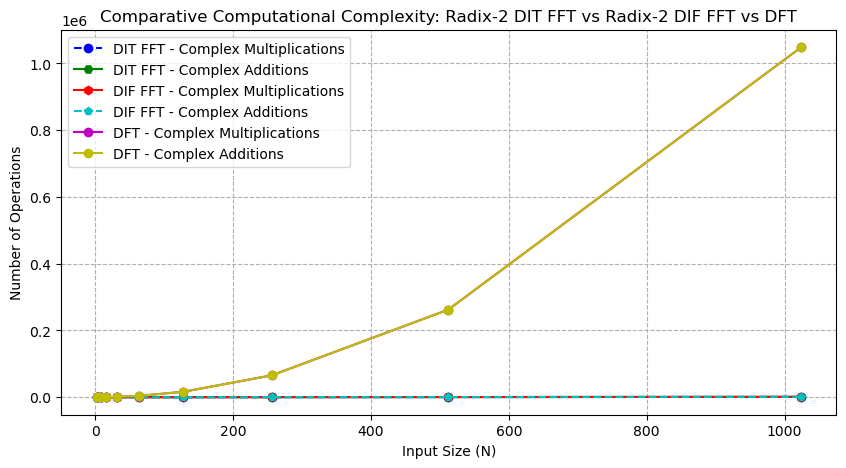

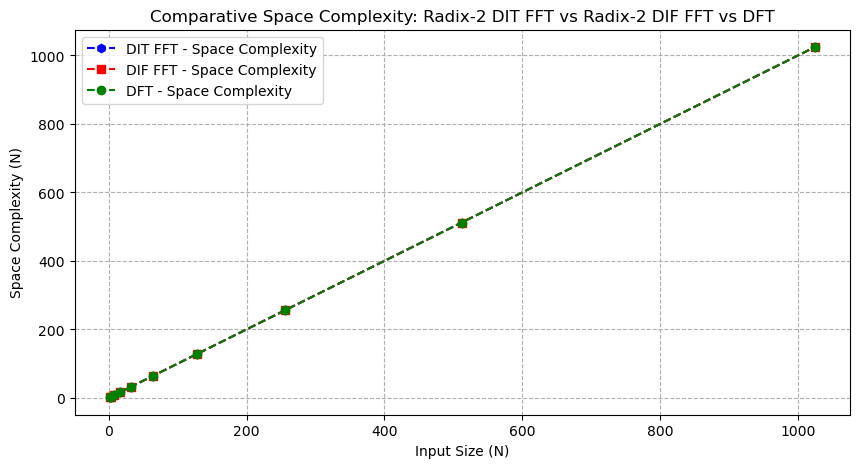

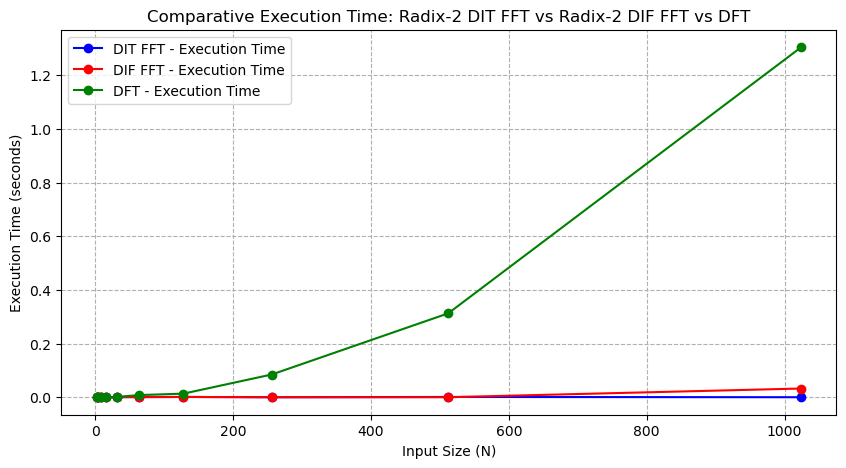

In [8]:
import cmath
import time
import matplotlib.pyplot as plt

# Radix-2 Decimation in Time (DIT) FFT
def fft_radix2_dit(x):
    # Get the length of the input sequence
    N = len(x)
    # Base case: If the sequence has 1 or fewer elements, return it (no further processing needed)
    if N <= 1:
        return x, 0, 0
    # Calculate the number of complex multiplications and additions needed for this level
    complex_mults = N // 2
    complex_adds = N // 2
    # Recursively apply DIT FFT on even-indexed elements
    even, even_mults, even_adds = fft_radix2_dit(x[::2])
    # Recursively apply DIT FFT on odd-indexed elements
    odd, odd_mults, odd_adds = fft_radix2_dit(x[1::2])
    # Calculate twiddle factors and perform multiplications
    T = [cmath.exp(-2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]
    # Update the counts of multiplications and additions for this level
    total_mults = complex_mults + N // 2  # N//2 for twiddle factor multiplications
    total_adds = complex_adds + N // 2    # N//2 for additions after multiplications
    # Return the combined even and odd results along with the counts
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)], total_mults, total_adds

# Radix-2 Decimation in Frequency (DIF) FFT
def fft_radix2_dif(x):
    # Get the length of the input sequence
    N = len(x)
    # Base case: If the sequence has 1 or fewer elements, return it (no further processing needed)
    if N <= 1:
        return x, 0, 0
    # Calculate the number of complex multiplications and additions needed for this level
    complex_mults = N // 2
    complex_adds = N // 2
    # Separate even and odd-indexed elements
    even = [x[i] for i in range(0, N, 2)]
    odd = [x[i] for i in range(1, N, 2)]
    # Recursively apply DIF FFT on even and odd sequences
    even_fft, even_mults, even_adds = fft_radix2_dif(even)
    odd_fft, odd_mults, odd_adds = fft_radix2_dif(odd)
    # Calculate twiddle factors and perform multiplications
    T = [cmath.exp(-2j * cmath.pi * k / N) * odd_fft[k] for k in range(N // 2)]
    # Update the counts of multiplications and additions for this level
    total_mults = complex_mults + N // 2  # N//2 for twiddle factor multiplications
    total_adds = complex_adds + N // 2    # N//2 for additions after multiplications
    # Return the combined even and odd results along with the counts
    return [even_fft[k] + T[k] for k in range(N // 2)] + [even_fft[k] - T[k] for k in range(N // 2)], total_mults, total_adds

# Discrete Fourier Transform (DFT) using the naive approach
def dft(x):
    # Get the length of the input sequence
    N = len(x)
    # Initialize a list to store the DFT coefficients
    X = [0] * N
    # Iterate over all frequencies (k)
    for k in range(N):
        Xk = 0
        # Iterate over all time indices (n)
        for n in range(N):
            # Calculate the DFT coefficient for this frequency
            Xk += x[n] * cmath.exp(-2j * cmath.pi * k * n / N)
        # Store the coefficient for this frequency
        X[k] = Xk
    # Return the list of DFT coefficients and the counts of multiplications and additions
    return X, N**2, N**2


def measure_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

input_sizes = [2**i for i in range(1, 11)]

dit_complex_mults = []
dit_complex_adds = []
dit_space_complexity = []
dit_execution_times = []

dif_complex_mults = []
dif_complex_adds = []
dif_space_complexity = []
dif_execution_times = []

dft_complex_mults = []
dft_complex_adds = []
dft_space_complexity = []
dft_execution_times = []

for size in input_sizes:
    input_sequence = [1] * size  # Example input sequence
    
    # Radix-2 DIT FFT
    _, dit_mults, dit_adds = fft_radix2_dit(input_sequence.copy())
    dit_complex_mults.append(dit_mults)
    dit_complex_adds.append(dit_adds)
    dit_space_complexity.append(size)
    
    # Radix-2 DIF FFT
    _, dif_mults, dif_adds = fft_radix2_dif(input_sequence.copy())
    dif_complex_mults.append(dif_mults)
    dif_complex_adds.append(dif_adds)
    dif_space_complexity.append(size)
    
    # DFT
    _, dft_mults, dft_adds = dft(input_sequence.copy())
    dft_complex_mults.append(dft_mults)
    dft_complex_adds.append(dft_adds)
    dft_space_complexity.append(size)

    # Measure execution time
    dit_execution_time = measure_execution_time(fft_radix2_dit, input_sequence.copy())
    dif_execution_time = measure_execution_time(fft_radix2_dif, input_sequence.copy())
    dft_execution_time = measure_execution_time(dft, input_sequence.copy())
    dit_execution_times.append(dit_execution_time)
    dif_execution_times.append(dif_execution_time)
    dft_execution_times.append(dft_execution_time)

# Plotting comparative computational complexity graph
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, dit_complex_mults, marker='o', color='b',linestyle='dashed', label='DIT FFT - Complex Multiplications')
plt.plot(input_sizes, dit_complex_adds, marker='H', color='g', label='DIT FFT - Complex Additions')
plt.plot(input_sizes, dif_complex_mults, marker='h', color='r', label='DIF FFT - Complex Multiplications')
plt.plot(input_sizes, dif_complex_adds, marker='p', color='c',linestyle='dashed', label='DIF FFT - Complex Additions')
plt.plot(input_sizes, dft_complex_mults, marker='o', color='m', label='DFT - Complex Multiplications')
plt.plot(input_sizes, dft_complex_adds, marker='o', color='y', label='DFT - Complex Additions')
plt.xlabel('Input Size (N)')
plt.ylabel('Number of Operations')
plt.title('Comparative Computational Complexity: Radix-2 DIT FFT vs Radix-2 DIF FFT vs DFT')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plotting comparative space complexity graph
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, dit_space_complexity, marker='h', color='b',linestyle='dashed', label='DIT FFT - Space Complexity')
plt.plot(input_sizes, dif_space_complexity, marker='s', color='r',linestyle='dashed', label='DIF FFT - Space Complexity')
plt.plot(input_sizes, dft_space_complexity, marker='o', color='g',linestyle='dashed', label='DFT - Space Complexity')
plt.xlabel('Input Size (N)')
plt.ylabel('Space Complexity (N)')
plt.title('Comparative Space Complexity: Radix-2 DIT FFT vs Radix-2 DIF FFT vs DFT')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plotting comparative execution time graph
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, dit_execution_times, marker='o', color='b', label='DIT FFT - Execution Time')
plt.plot(input_sizes, dif_execution_times, marker='o', color='r', label='DIF FFT - Execution Time')
plt.plot(input_sizes, dft_execution_times, marker='o', color='g', label='DFT - Execution Time')
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparative Execution Time: Radix-2 DIT FFT vs Radix-2 DIF FFT vs DFT')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
